# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     951.5
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           2.20e-41
Time:                        18:12:35   Log-Likelihood:                 2.6084
No. Observations:                  50   AIC:                             2.783
Df Residuals:                      46   BIC:                             10.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0451      0.082     61.817      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.5224076   5.02858634  5.49167909  5.88150104  6.1787609   6.37823045
  6.48960349  6.53590318  6.5496994   6.56775764  6.62499847  6.74876028
  6.95430756  7.24232306  7.59879559  7.99732202  8.40344523  8.78031536
  9.09474406  9.32265733  9.45305073  9.48979745  9.45101189  9.36607358
  9.27080015  9.20156263  9.18930976  9.25448326  9.40365923  9.6284678
  9.9069682  10.20725362 10.49269339 10.72795129 10.8847912  10.94671621
 10.91167902 10.7924183  10.61436576 10.4114678  10.22060821 10.07554828
 10.00137988 10.01040297 10.10010475 10.25357248 10.44227223 10.63073688
 10.78239333 10.86557128]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.84364793 10.67609579 10.38463512 10.01876362  9.64363769  9.32411983
  9.10889811  9.01856556  9.04057831  9.13232678]


## Plot comparison

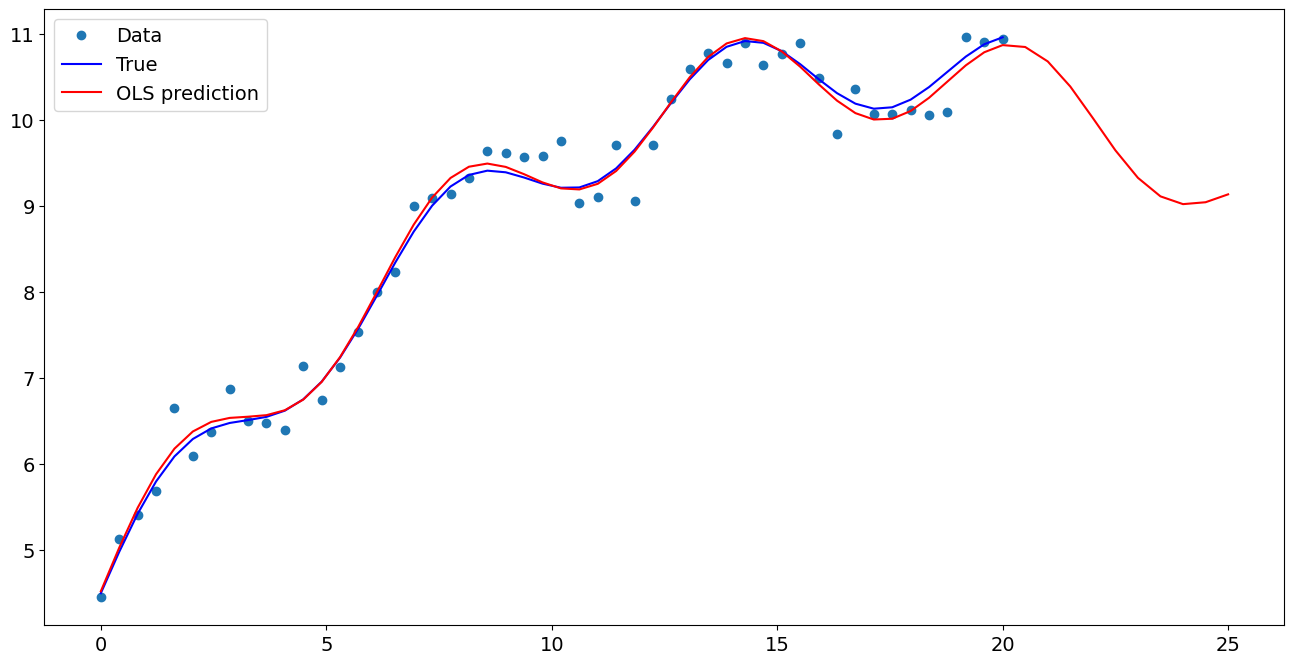

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.045143
x1                  0.500970
np.sin(x1)          0.553859
I((x1 - 5) ** 2)   -0.020909
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.843648
1    10.676096
2    10.384635
3    10.018764
4     9.643638
5     9.324120
6     9.108898
7     9.018566
8     9.040578
9     9.132327
dtype: float64